In [63]:
%%time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from Functions.Preprocess import events_to_df_vert3
data1_path = "Data/from_cluster/26.9.20/bb1.root.RaveTest_cluster.1.0.txt"
data2_path = "Data/from_cluster/26.9.20/dark1.root.RaveTest_cluster.1.0.txt"

max_ev = 100000
n_constits = 5
trunc = False

B = events_to_df_vert3(data1_path, label=0, max_ev=max_ev, n_constits=n_constits, trunc=trunc)
S = events_to_df_vert3(data2_path, label=1, max_ev=max_ev, n_constits=n_constits, trunc=trunc)

Wall time: 7.57 s


In [34]:
B.head()

Event       MET  jet1_PT  jet1_Eta  jet1_Phi  jet2_PT  jet2_Eta  jet2_Phi  \
0      1  21.15690  207.692 -2.343440  0.260427  139.019 -1.659890 -2.891270   
1      2  30.35820  161.249  0.858165 -2.947290  141.895  0.889747  0.256459   
2      3   4.49044  157.091 -1.156370 -2.562820  117.215 -2.156310  0.671204   
3      4  15.59470  167.435  0.540816 -1.392400  153.095 -0.227913  1.979330   
4      5  10.43410  124.060 -1.692410 -2.964060  111.114 -1.432700  0.347524   

                 n_vert          jet_association  ...  \
0  [1.0, 2.0, 3.0, 4.0]  [-2.0, -2.0, -2.0, 2.0]  ...   
1  [1.0, 3.0, 4.0, 2.0]   [-2.0, -2.0, 1.0, 2.0]  ...   
2            [2.0, 1.0]             [-2.0, -2.0]  ...   
3            [1.0, 2.0]               [1.0, 2.0]  ...   
4                 [1.0]                   [-2.0]  ...   

                                      vert_Phi  \
0      [0.827123, 1.5015, -0.776767, -2.92422]   
1  [-0.105457, -0.431483, -2.97139, 0.0811961]   
2                           [1.23267, 1.83799]   
3                          [-1.49254, 2.05341]   
4                                   [0.706007]   

                                deltaR1  \
0  [1.38648, 2.30168, 3.50196, 3.18404]   
1   [3.38463, 2.53278, 0.02587, 3.0285]   
2                    [3.73721, 2.59798]   
3                   [0.332033, 2.93211]   
4                             [2.88532]   

                                  deltaR2  \
0     [2.62996, 2.269, 3.39905, 0.059351]   
1  [1.90467, 0.760518, 3.05561, 0.179336]   
2                      [3.83024, 3.02464]   
3                    [2.84745, 0.0797078]   
4                               [1.02821]   

                              vert_chisq label n_verts n_associated_verts  \
0  [39.9983, 0.0400445, 3.66216, 1.3079]     0       4                  1   
1  [52.1192, 5.46842, 0.464983, 1.99328]     0       4                  2   
2                   [0.0526839, 61.3276]     0       2                  0   
3                      [95.7688, 11.832]     0       2                  2   
4                              [20.3588]     0       1                  0   

  n_non_associated_verts  SV_mult   SV_disp  
0                      3      2.0  0.264445  
1                      2      3.0  0.196843  
2                      2     40.0  0.025358  
3                      0      6.0  4.042930  
4                      1      NaN       NaN  

[5 rows x 24 columns]

In [59]:
def feat_hist(df, feat, df_name, lim=None):
    if not lim:
        lim = max(df[feat])
    plt.figure()
    df[feat].hist(bins=np.arange(-0.5, lim, 1))   
    plt.xticks(np.arange(0,lim, 1))
    plt.title(df_name + " - " + feat)
    plt.gcf().set_size_inches(15, 10)
def vert_hists(df, df_name):
    df["n_verts"] = df.n_vert.map(lambda x: len(x))
    df["n_associated_verts"] = df.jet_association.map(lambda x: 0 if len(x)<2 else sum(x[1:]>0))
    df["n_non_associated_verts"] = df.jet_association.map(lambda x: 0 if len(x)<2 else sum(x[1:]<0))
    df["SV_mult"] = df.vert_mult.map(lambda x: np.nan if len(x)<2 else x[1])
    df["SV_disp"] = df.vert_D0.map(lambda x: np.nan if len(x)<2 else x[1])
    print(len(df[df.n_associated_verts>0])/len(df))
    feat_hist(df, "n_verts", df_name)
    feat_hist(df, "n_associated_verts", df_name)
    feat_hist(df, "n_non_associated_verts", df_name)
    feat_hist(df, "SV_mult", df_name, lim=60)
    plt.figure()
    df.SV_disp.hist(bins=np.arange(0,3, 0.05))
    plt.title(df_name + " - " + "SV_disp")
    plt.gcf().set_size_inches(15, 10)

0.7799503662490493


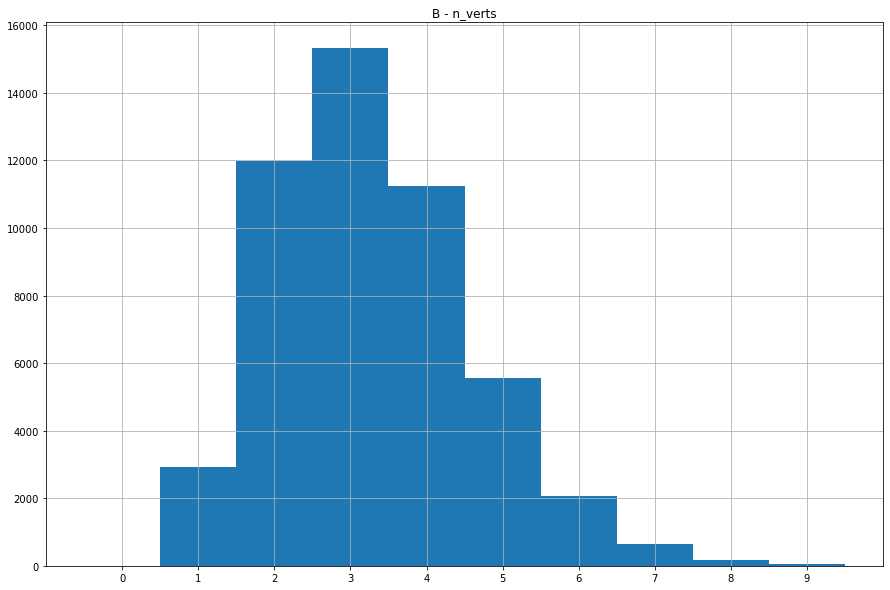

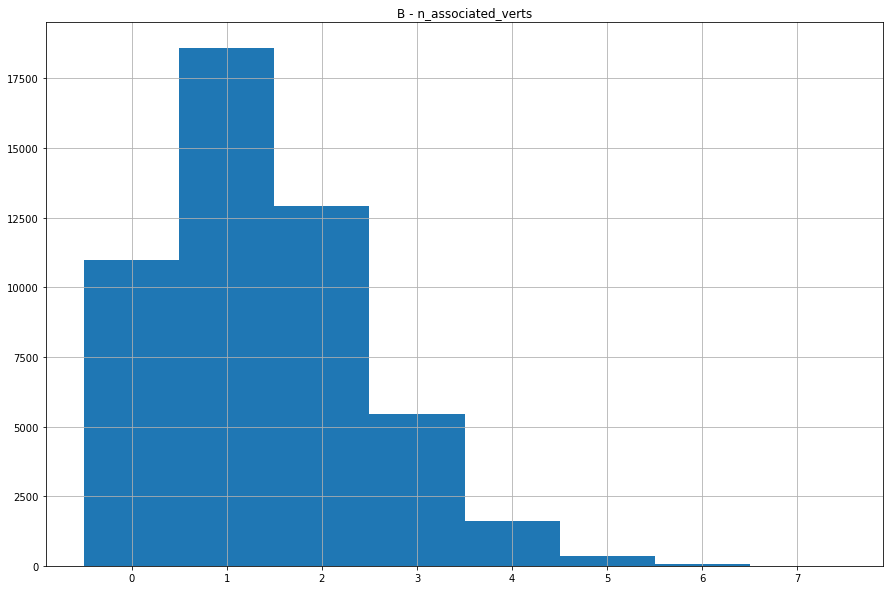

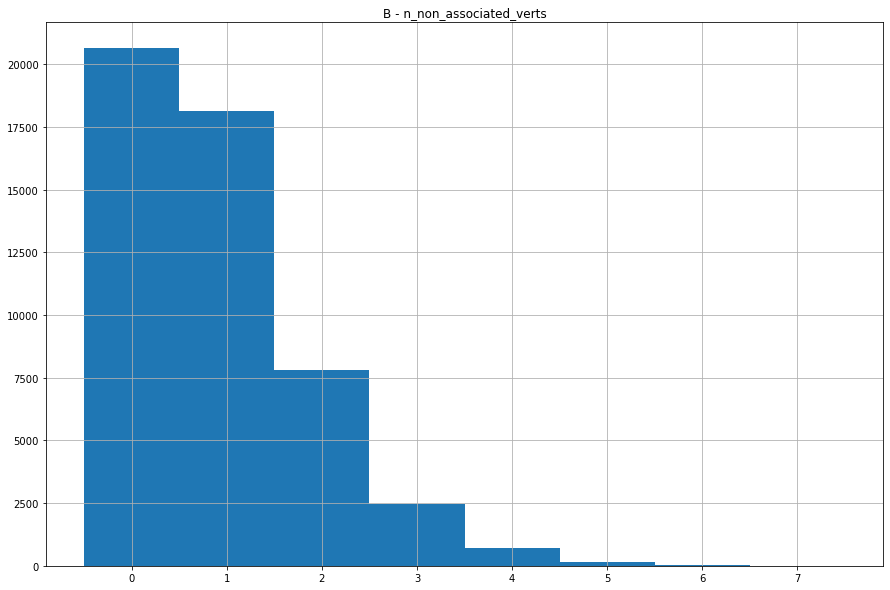

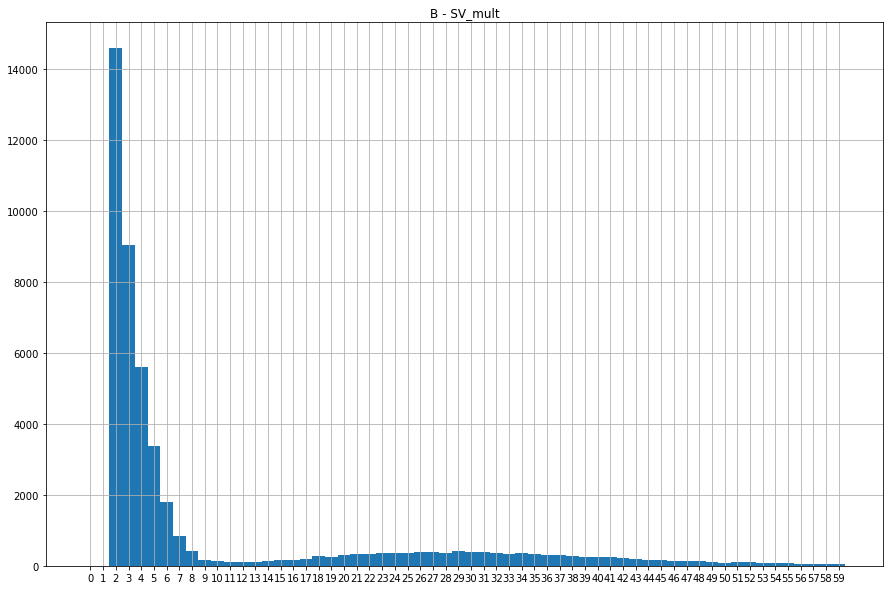

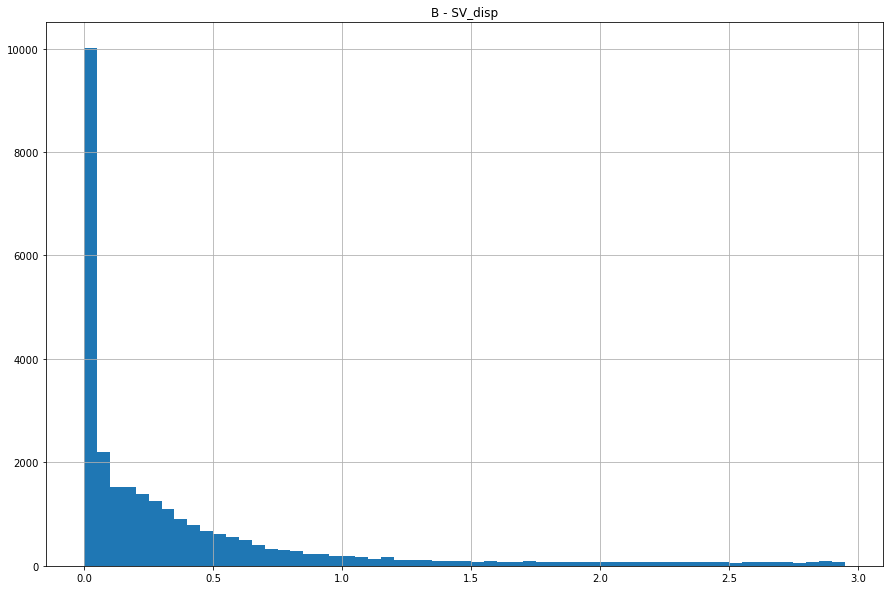

In [64]:
vert_hists(B, "B")

0.9749984999099947


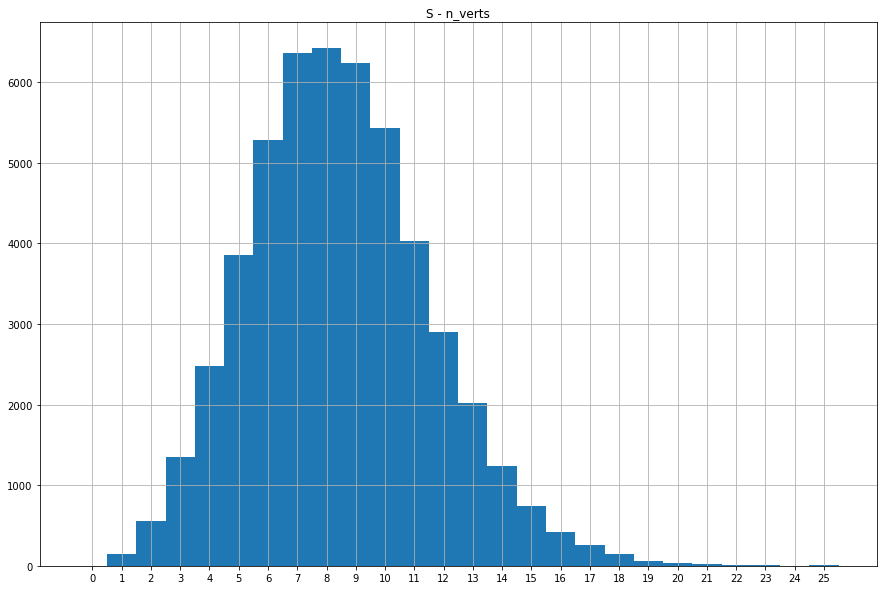

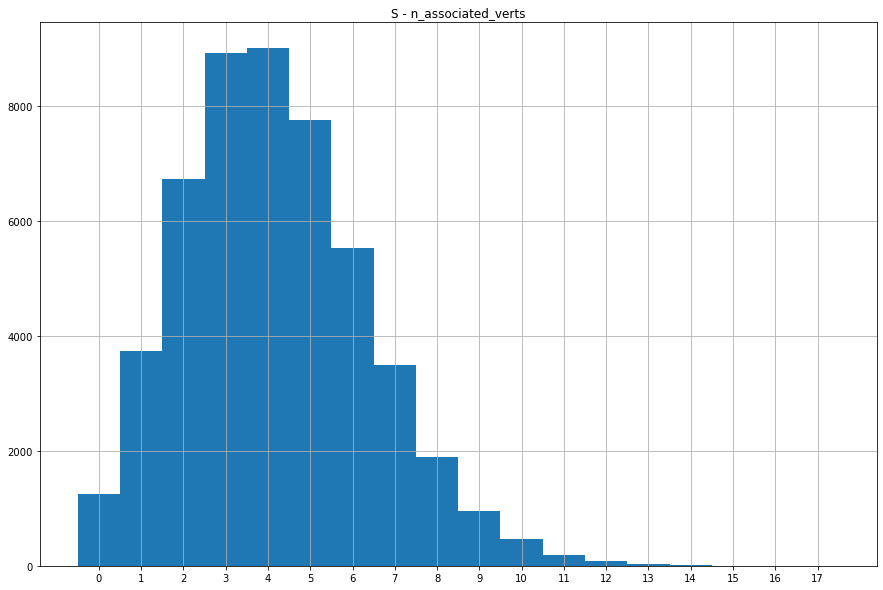

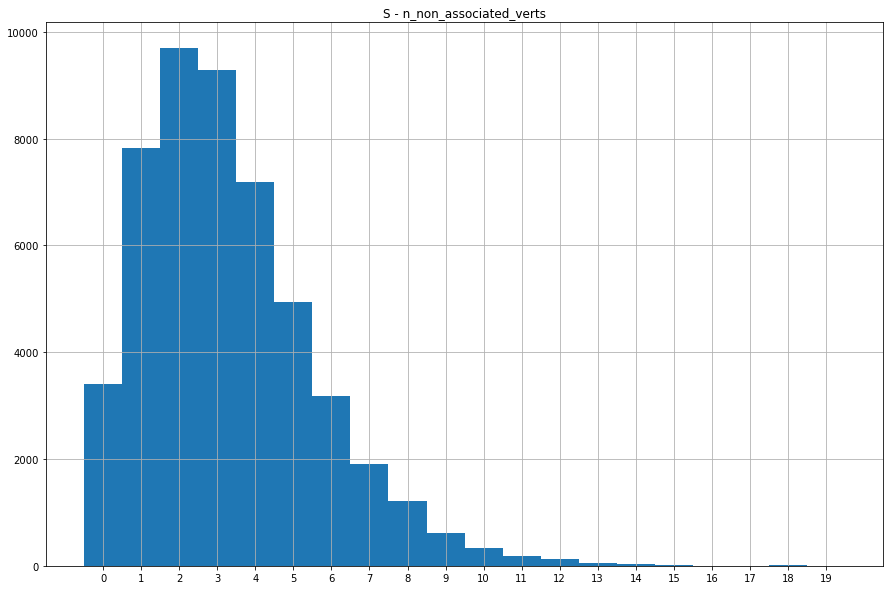

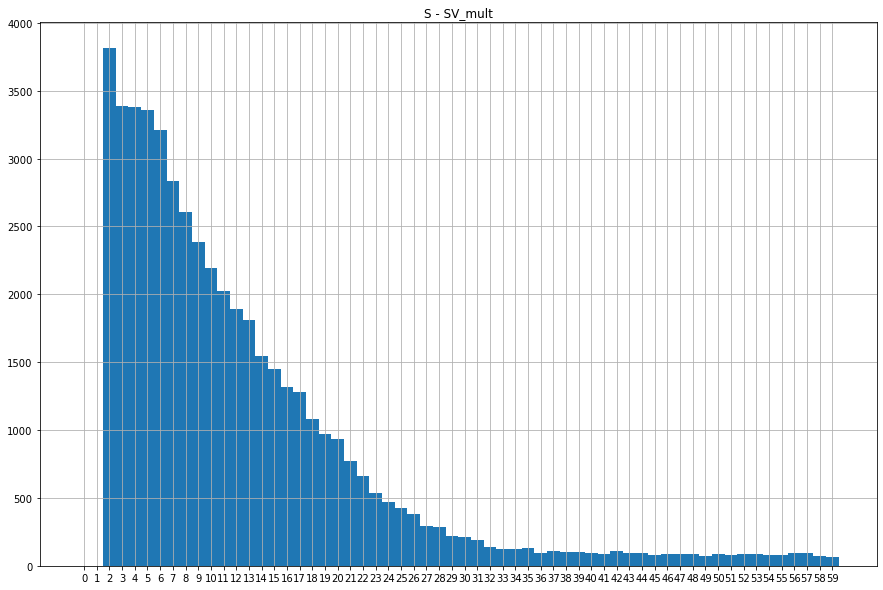

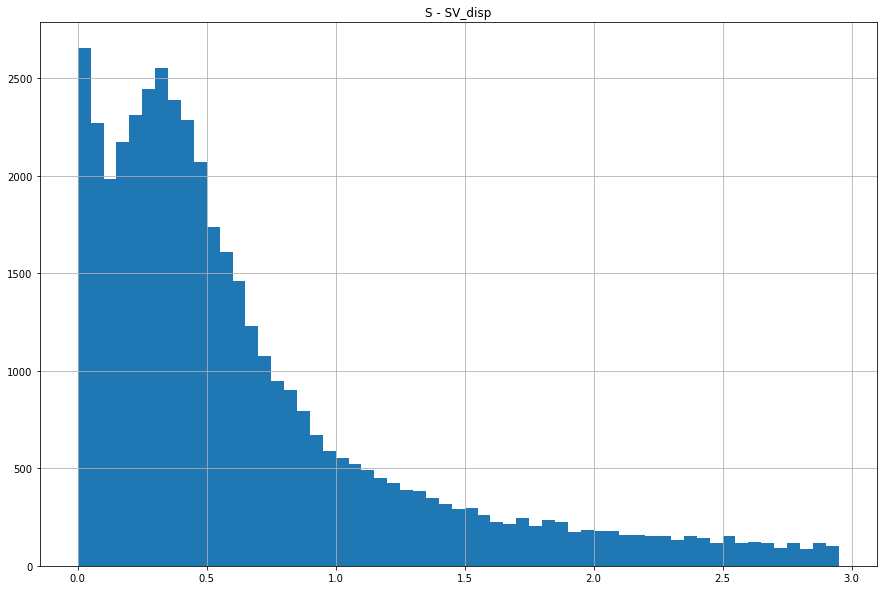

In [65]:
vert_hists(S, "S")